In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
import growth_curve_analysis as od

In [22]:
expt = od.analyze_experiment('/Users/nwespe/Desktop/GROC/ypd nacl data.txt', 
                             plate_layout = '/Users/nwespe/Desktop/GROC/ypd nacl layout.xlsx',
                             blank_file = '/Users/nwespe/Desktop/GROC/gen_blank_file.xlsx',
                             out_dir = '/Users/nwespe/Desktop/GROC/test/', 
                             sample_plots = True, correction = [0.6, 0.2141, 1.7935])

initialized experiment
analyzed samples
created output data table


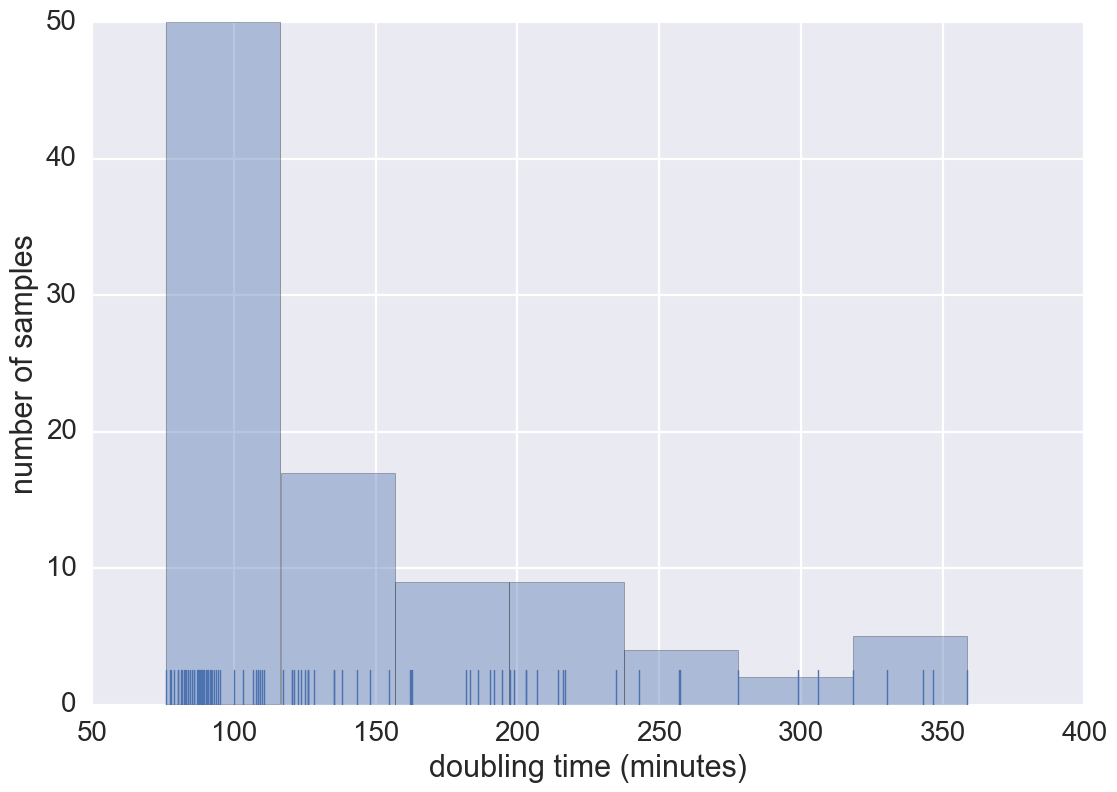

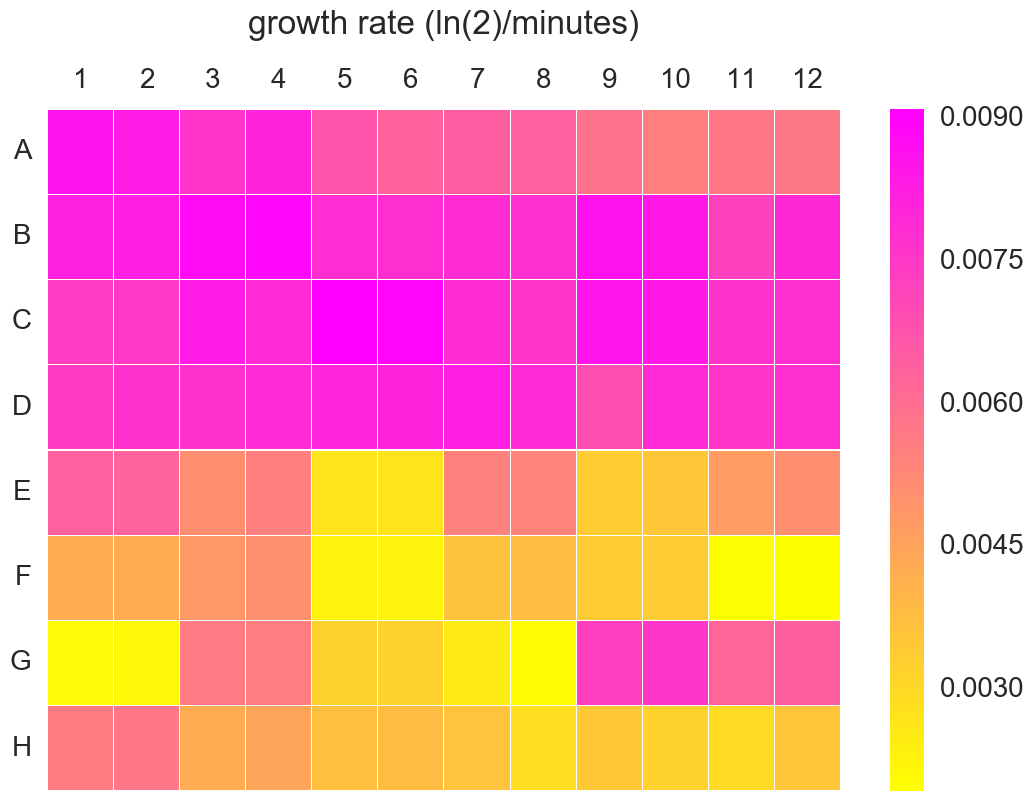

In [4]:
od.make_plots(expt)

initialized experiment
analyzed samples
created output data table


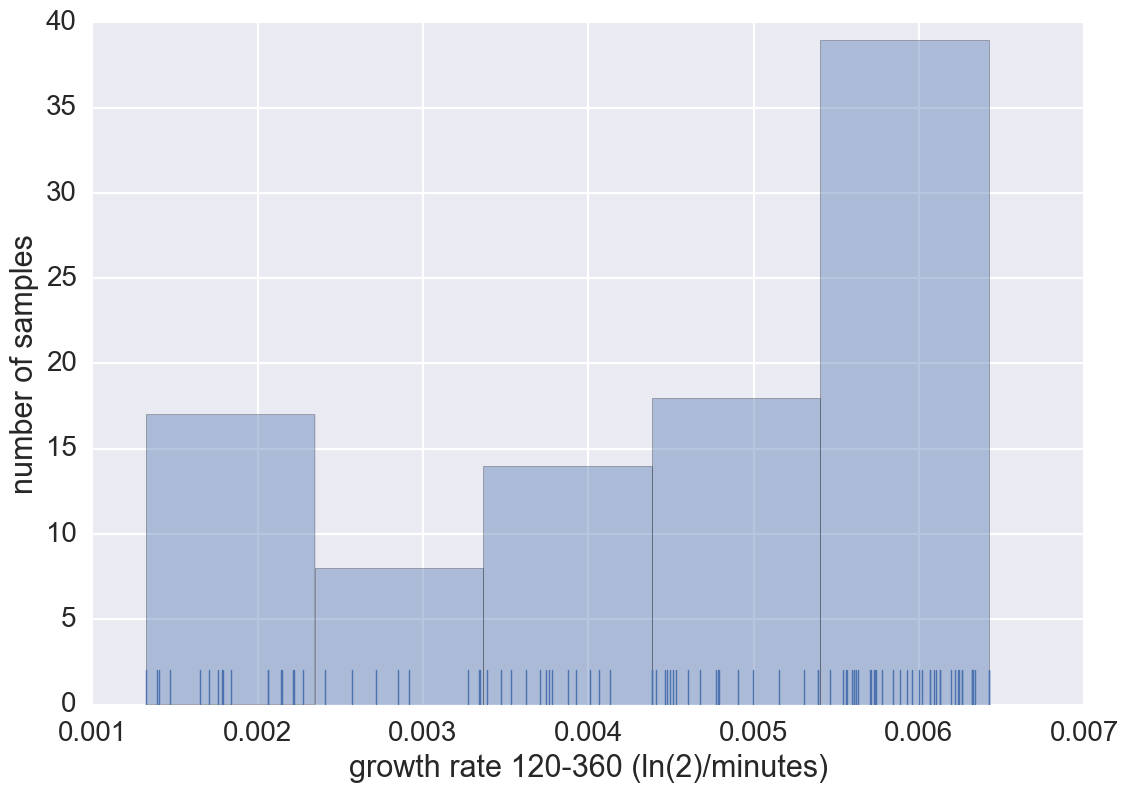

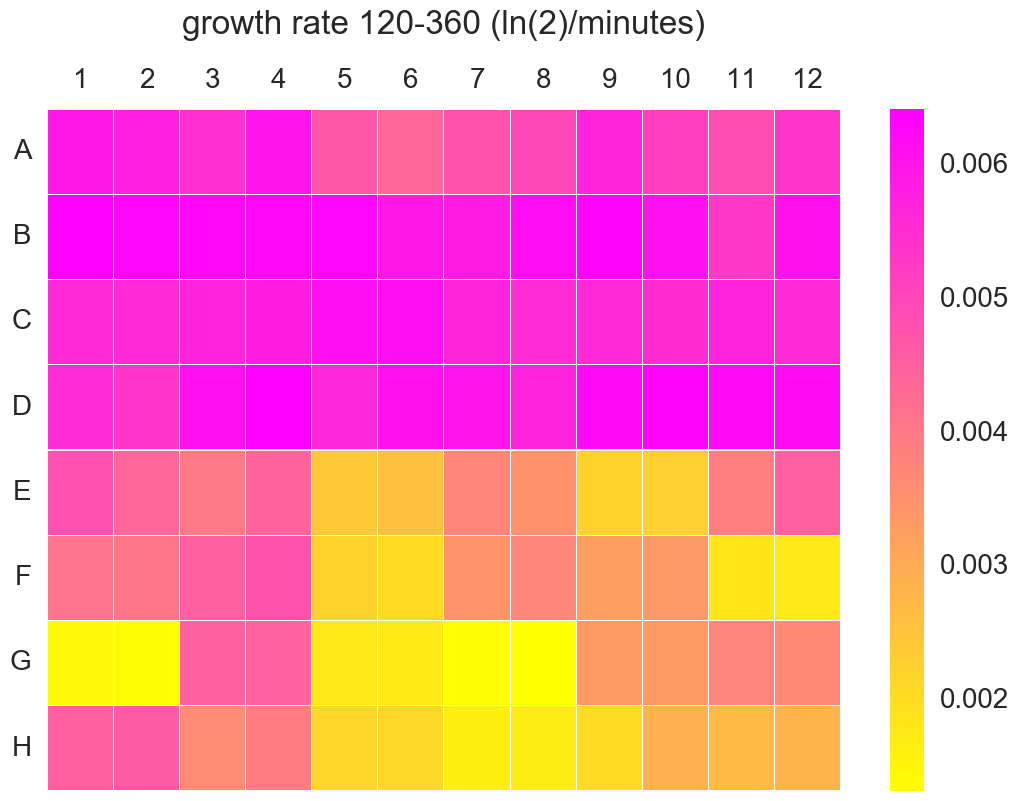

In [6]:
expt2 = od.analyze_experiment('/Users/nwespe/Desktop/GROC/ypd nacl data.txt', 
                             plate_layout = '/Users/nwespe/Desktop/GROC/ypd nacl layout.xlsx',
                             blank_file = '/Users/nwespe/Desktop/GROC/gen_blank_file.xlsx',
                             out_dir = '/Users/nwespe/Desktop/GROC/', 
                             method = 'effective_growth_rate', 
                             start = 120, end = 360, saturation = True,
                             sample_plots = True)
od.make_plots(expt2, save = True, 
              metric1 = 'growth rate 120-360', unit1 = 'ln(2)/minutes', 
              metric2 = 'growth rate 120-360', unit2 = 'ln(2)/minutes')

In [36]:
import pandas as pd
plate_info = pd.read_excel(expt.plate_layout, converters={'strain': lambda x: str(x)})

In [37]:
plate_info[:3]

,well,name,media,replicate,expt_date,run,strain,clone
0,A1,003,YPD,1,2016-10-15,YPD+/-NaCl,003,NaN
1,A2,003,YPD,2,2016-10-15,YPD+/-NaCl,003,NaN
2,A3,127,YPD,1,2016-10-15,YPD+/-NaCl,127,NaN


initialized experiment
determining window size
window size is 9
analyzed samples
created output data table


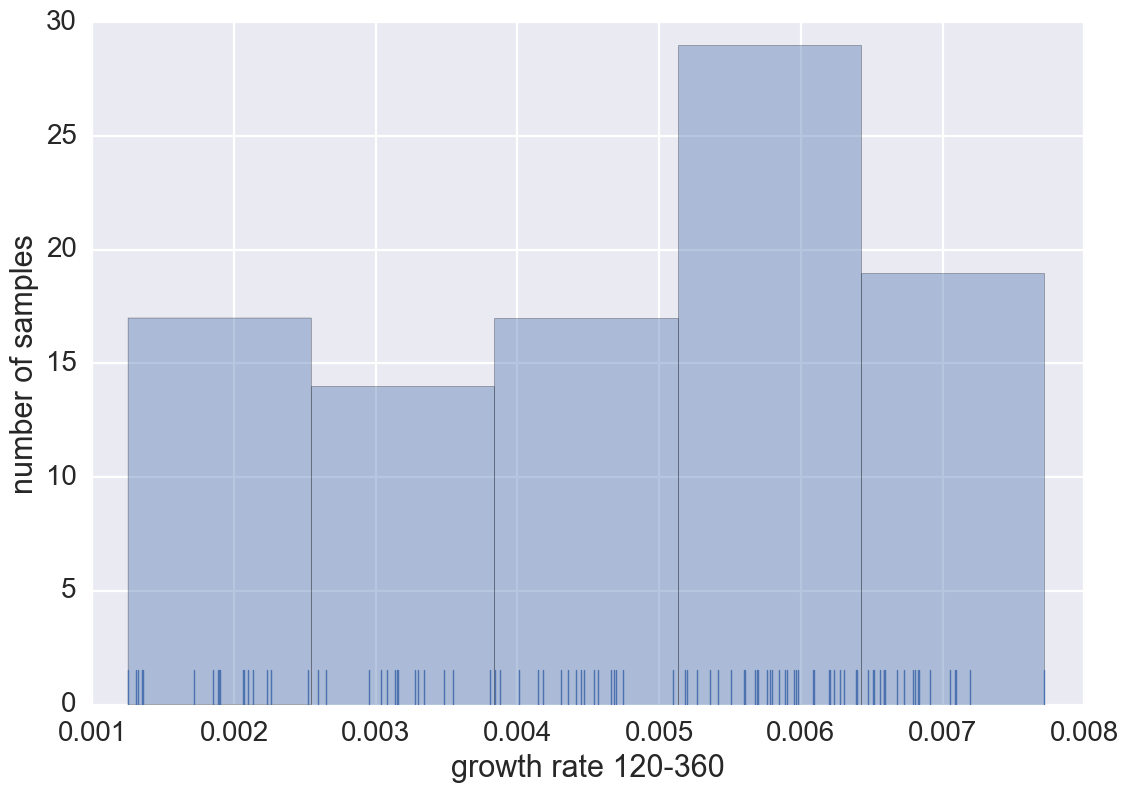

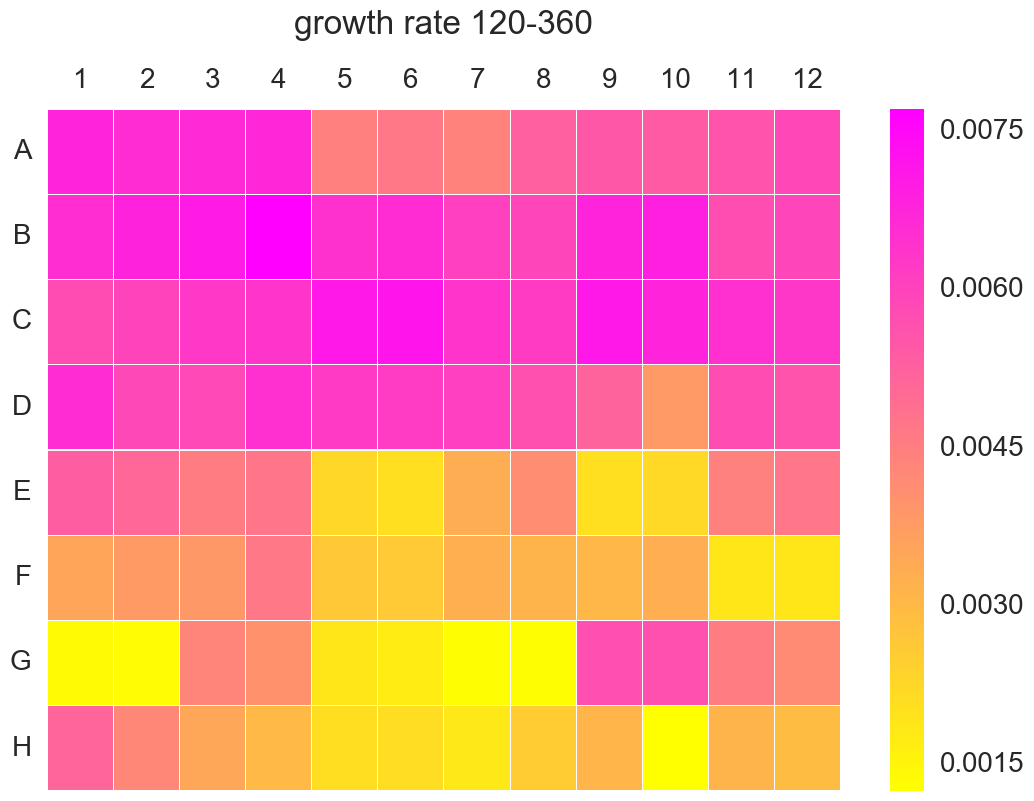

In [7]:
expt = od.Experiment('/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl data.txt', 
    plate_layout = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl layout.xlsx',
    blank_file = blank_file,
    out_dir='/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/GC Analysis/Feb2017/'+date+'/')
# for effective growth rate calc only
expt.analyze_sample_data(method='effective_growth_rate', sample_plots=True, start=120, end=360, saturation=True)
expt.output_data()
expt.summary()
od.make_plots(expt, metric1='growth rate 120-360', unit1='', metric2='growth rate 120-360', save=True)

In [7]:
%load_ext autoreload

In [8]:
%autoreload 2

In [6]:
date = '20160727'

In [5]:
blank_file = '/Users/nwespe/Desktop/GROC/gen_blank_file.xlsx'

In [16]:
well = 'A1'

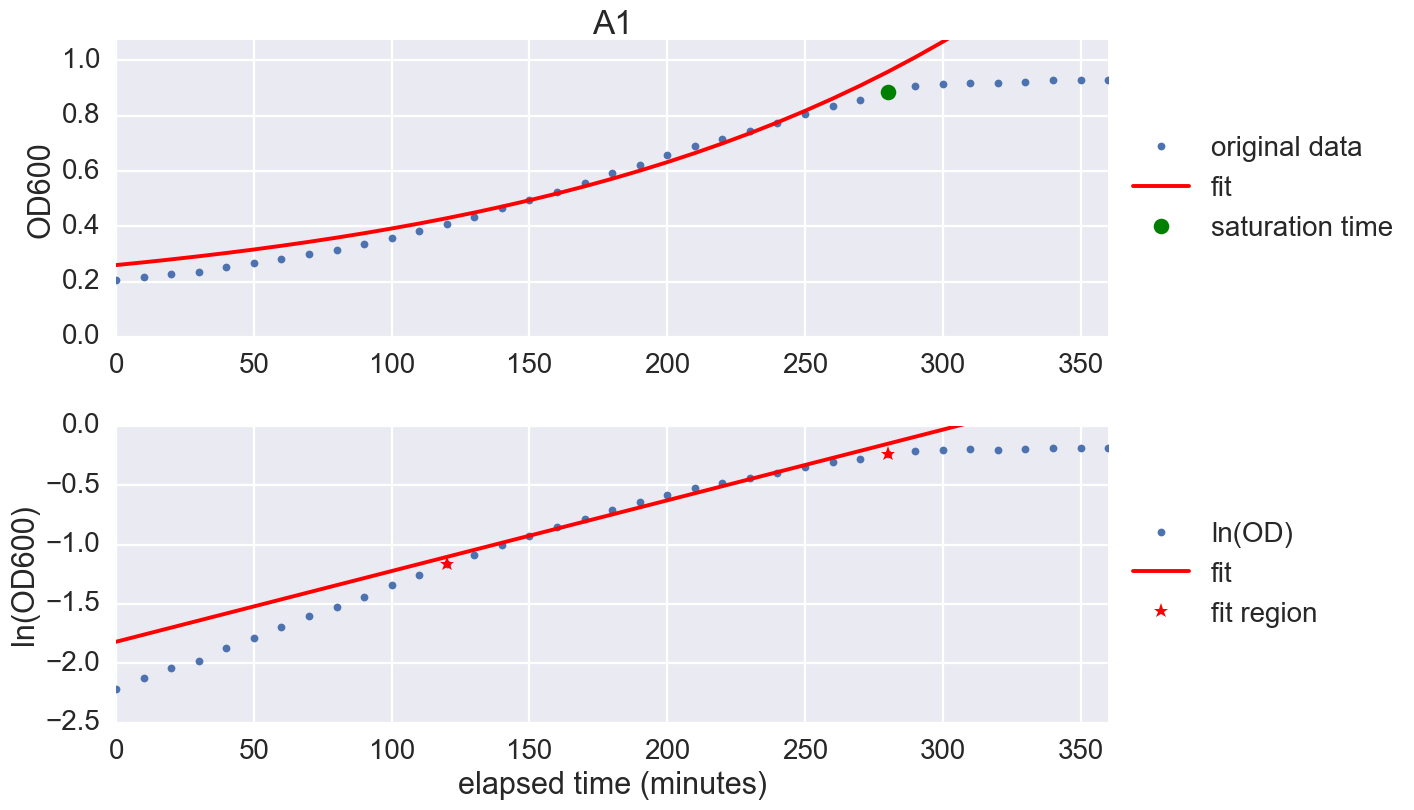

In [18]:
self = expt2.samples[well]
self.plot_growth_parameters(save = True)

In [ ]:
self.eff_end

In [ ]:
from scipy import interpolate, signal, stats

In [ ]:
# used to override use of saturation point as end point for effective gr calc
self.eff_end = 36
times = self.elapsed_time[self.eff_start:self.eff_end]
sub_data = self.log_data[self.eff_start:self.eff_end]
results = stats.mstats.linregress(times, sub_data)
self.effective_gr = results[0]
self.effective_int = results[1]
self.effective_r2 = results[2]**2
if self.effective_r2 < 0.85 or self.effective_gr <= 0 or np.isnan(self.effective_gr):
# lowered to accommodate samples that reach saturation
    self.effective_gr = 0
    self.effective_int = np.mean(sub_data)
    self.effective_dt = np.nan
else:
    self.effective_dt = np.log(2)/self.effective_gr
self.effective_fit = [((self.effective_gr * x) + self.effective_int) for x in self.elapsed_time]

In [ ]:
self.sat_time

In [ ]:
self.plot_growth_parameters(show=True, save=False)

In [ ]:
expt.analyze_sample_data(method='effective_growth_rate', sample_plots=True, start=0, end=360, saturation=True)
expt.output_data()
od.make_plots(expt, metric1='growth rate 0-360', unit1='', metric2='growth rate 0-360', save=True)

In [ ]:
A1.plot_rates_distribution()